In [10]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
%matplotlib inline

In [45]:
df = pd.read_csv("CVS.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-02,28.809999,29.549999,28.559999,29.379999,23.839165,6352800
1,2009-01-05,29.370001,30.049999,29.370001,29.799999,24.179953,8583800
2,2009-01-06,30.000000,30.469999,29.090000,29.350000,23.814823,8914400
3,2009-01-07,29.010000,29.580000,28.750000,29.389999,23.847277,6758100
4,2009-01-08,28.430000,29.389999,27.950001,29.340000,23.806707,8779900
...,...,...,...,...,...,...,...
2763,2019-12-24,74.529999,74.779999,74.360001,74.510002,74.010536,1315400
2764,2019-12-26,74.699997,74.760002,74.139999,74.480003,73.980743,2801100
2765,2019-12-27,74.510002,74.610001,74.040001,74.400002,73.901276,3543500
2766,2019-12-30,74.269997,74.529999,73.610001,73.699997,73.205963,3450800


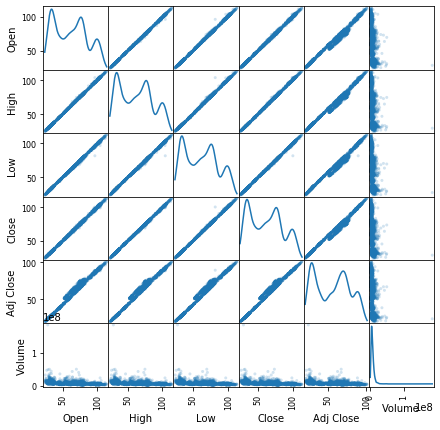

In [19]:
scatter_matrix(df, alpha=0.2, figsize=(7,7), diagonal='kde');

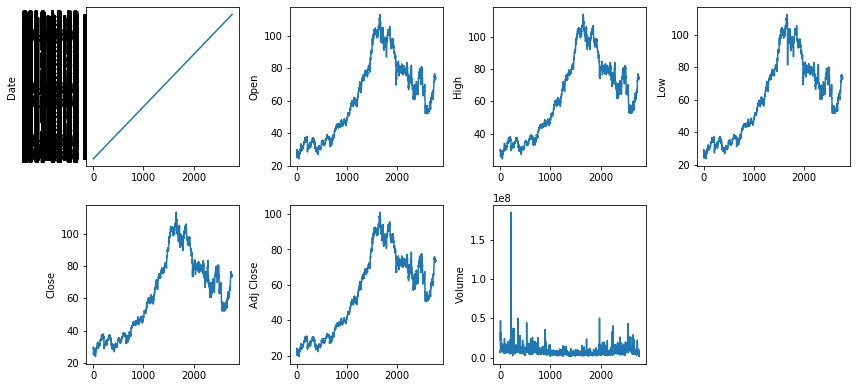

In [69]:
fig = plt.figure(figsize=(12,8))
plt.clf() # Clear previous plt figure
for i in range(7):
    plt.subplot(3, 4, i+1) # Selects which subplot to plot to
    plt.plot(df.iloc[:, i]) # Plots a given column
    plt.ylabel(df.columns.values[i]) # Sets Y label
fig.tight_layout()

In [43]:
volumeLog = np.log(df["Volume"]) 
volumeLog

0       15.664406
1       15.965387
2       16.003179
3       15.726252
4       15.987976
          ...    
2763    14.089651
2764    14.845523
2765    15.080625
2766    15.054117
2767    15.326652
Name: Volume, Length: 2768, dtype: float64

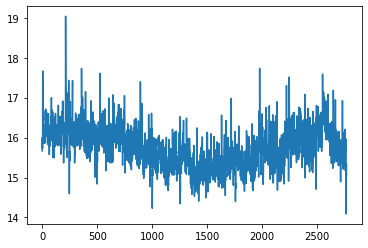

In [44]:
plt.plot(volumeLog)

It seems maybe as volumes goes down closing price goes up

In [46]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2.768000e+03
mean,62.438891,62.985741,61.882601,62.444122,55.777565,7.845172e+06
std,23.736019,23.867033,23.563628,23.717242,22.463285,5.729768e+06
min,24.200001,24.590000,23.740000,23.980000,19.514372,1.315400e+06
25%,37.630001,37.960001,37.287501,37.542499,31.284608,4.822250e+06
50%,62.984998,63.615000,62.315000,62.935000,58.749033,6.705650e+06
75%,79.222501,79.822500,78.680000,79.257500,73.135637,9.422625e+06
max,113.349998,113.650002,112.449997,113.449997,101.086067,1.851235e+08


In [66]:
X = df.iloc[:, 1:-1].copy() # dropping date
normX = (X-np.mean(X, axis=0))/np.std(X, axis=0)
T = df.iloc[:, -1].copy() 
logT = np.log(T)

normX.describe()

,Open,High,Low,Close,Adj Close
count,2.768000e+03,2.768000e+03,2.768000e+03,2.768000e+03,2.768000e+03
mean,1.124863e-15,5.688148e-15,5.862864e-15,2.957974e-15,2.611230e-15
std,1.000181e+00,1.000181e+00,1.000181e+00,1.000181e+00,1.000181e+00
min,-1.611298e+00,-1.609026e+00,-1.618999e+00,-1.622072e+00,-1.614623e+00
25%,-1.045389e+00,-1.048738e+00,-1.043963e+00,-1.050127e+00,-1.090552e+00
50%,2.301171e-02,2.636998e-02,1.835360e-02,2.070081e-02,1.323050e-01
75%,7.072224e-01,7.055675e-01,7.129816e-01,7.090376e-01,7.728704e-01
max,2.145276e+00,2.123155e+00,2.146381e+00,2.150971e+00,2.017367e+00


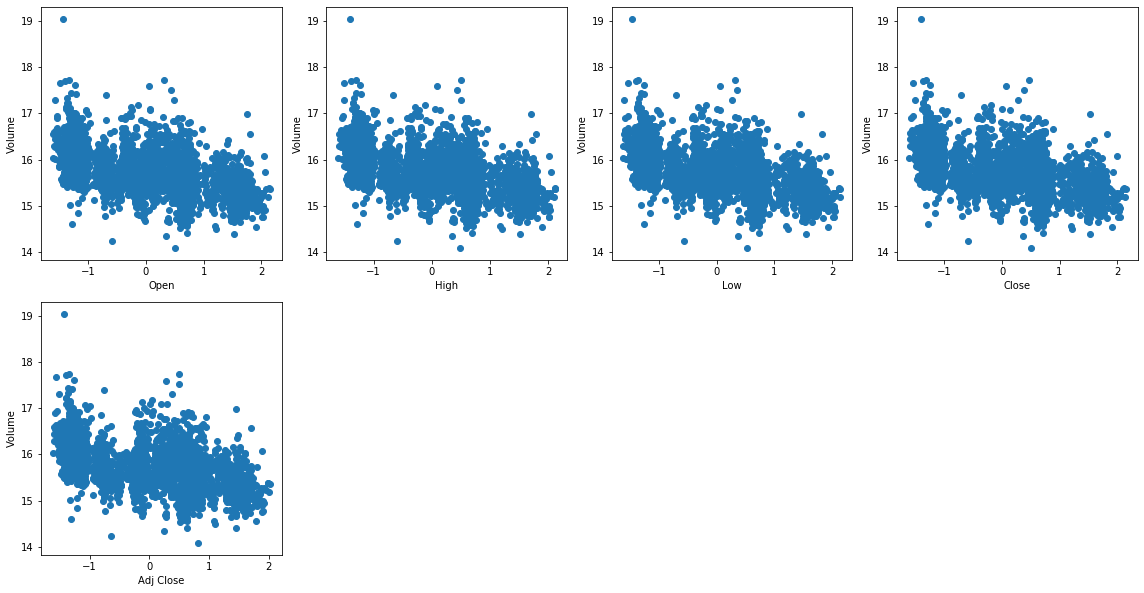

In [67]:
fig = plt.figure(figsize=(16,12))
plt.clf() # Clear previous plt figure
for i in range(5):
    plt.subplot(3, 4, i+1) # Selects which subplot to plot to
    plt.scatter(normX.iloc[:, i], logT) # Plots a given column
    plt.ylabel("Volume") # Sets Y label
    plt.xlabel(X.columns.values[i])
fig.tight_layout()

There seems to be slight variation between the diferent inputs but most of them follow the same patern in realtion to volume.